# Don't Run

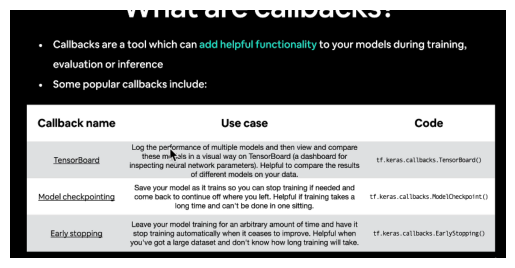

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Import the image module

# Load the image data from the file path
img_data = mpimg.imread("/content/Screenshot 2025-05-27 040949.png")

# Display the image data
plt.imshow(img_data)
plt.axis("off")
plt.show()

# Transfer Learning with Tensorflow Part 1 : Feature Extraction
Transfer learning is leveraging a working model's existing architecture and learned patterns for our own problem.

There are 2 main benefits:
1. Can leverage existing neural nertwork architecture proven to work on problems similar to our own.
2. Can leverage a working neural network architecture which has already learned patterns on similar data to our own , then we can adapt those patterns to our own data.

In [57]:
# Are we using a gpu
!nvidia-smi

Tue May 27 19:03:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P0             29W /   70W |   12404MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Downloading and becoming one with data

In [58]:
# Get data (10% of 10 food classes from Food 101)
import zipfile

# Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip it
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-05-27 19:03:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 192.178.219.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   246MB/s    in 0.7s    

2025-05-27 19:03:57 (246 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [59]:
# How many images in each folder ?
import os

# Walk through 10 % data
for dirpath, dirnames,filenames in os.walk("/content/10_food_classes_10_percent"):
  print(f"there are {len(dirnames)} direcrtories and {len(filenames)} images in {dirpath}")

there are 2 direcrtories and 0 images in /content/10_food_classes_10_percent
there are 10 direcrtories and 0 images in /content/10_food_classes_10_percent/test
there are 0 direcrtories and 250 images in /content/10_food_classes_10_percent/test/sushi
there are 0 direcrtories and 250 images in /content/10_food_classes_10_percent/test/chicken_curry
there are 0 direcrtories and 250 images in /content/10_food_classes_10_percent/test/hamburger
there are 0 direcrtories and 250 images in /content/10_food_classes_10_percent/test/grilled_salmon
there are 0 direcrtories and 250 images in /content/10_food_classes_10_percent/test/steak
there are 0 direcrtories and 250 images in /content/10_food_classes_10_percent/test/pizza
there are 0 direcrtories and 250 images in /content/10_food_classes_10_percent/test/fried_rice
there are 0 direcrtories and 250 images in /content/10_food_classes_10_percent/test/ice_cream
there are 0 direcrtories and 250 images in /content/10_food_classes_10_percent/test/chicke

In [60]:
class_names = list(train_data.class_indices.keys())
print(class_names)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


## Create data loaders (preparing the data)

We'll use ImageDataGenerator class to load in our images in batches

In [61]:
# Setup data inputs
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"


In [62]:
# Set up datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 0.2,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   )
test_datagen = ImageDataGenerator(rescale = 1/255.)

print("Training images:")
# Create image data generator
train_data_aug = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    target_size = IMAGE_SHAPE
)
train_data = test_datagen.flow_from_directory(
    test_dir,
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    target_size = IMAGE_SHAPE
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    target_size = IMAGE_SHAPE
)


Training images:
Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Setting up callbacks (things to run whilst our model trains)

Callbacks are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks :

* Tracking experiments with the TensorBoard callback
* Model checkpoint with the ModelCheckpoint callback
* Stopping a model from training ( before it trains too long and overfits) with EarlyStopping callbacks.


In [63]:
from logging import log
import tensorflow as tf
import tf_keras

# Create TensorBoard callback (functionized because we need to create a new one for each model)
import datetime

def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf_keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving Tensorflow log files to : {log_dir}")
  return tensorboard_callback

### Note :
You can costomise the directory where your TensorBoard logs (model training metrics) gets saved.
The log_dir parameter we have created above is only one option

## Creating models using TensorFlow Hub

In the past we have used tf to create our own models layer by layer from scratch.

Now we are going to do a similar process,except the majority of our model's layer are goin to come from TensorFlow Hub.

We can access pretrained models on : https://www.tensorflow.org/hub

Explored and found :
* https://www.kaggle.com/models/google/efficientnet-v2

* https://www.kaggle.com/models/tensorflow/efficientnet/tensorFlow2/b0-feature-vector/1?tfhub-redirect=true

*
"https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [64]:
# Let's compare 2 models
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/101-classification/2"
efficientnet_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1"


In [65]:
# Import Dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import tf_keras

In [66]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url, trainable=False, input_shape=IMAGE_SHAPE+ (3,), name='feature_extraction_layer')

  #Create model (add layers after creation of model or else errors will occur)
  model = tf_keras.Sequential()
  model.add(feature_extractor_layer)
  model.add(tf_keras.layers.Dense(num_classes, activation=tf.keras.activations.softmax, name='output_layer'))

  return model

### Creating and testing ResNet TensorFlow Hub Feature extraction model

In [67]:
# Create ResNet model
resnet_model = create_model(resnet_url,
                            num_classes = 10)


In [68]:
#Compile our resnet model
resnet_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = "Adam",
    metrics = ["accuracy"])

In [69]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1001)              44677609  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                10020     
                                                                 
Total params: 44687629 (170.47 MB)
Trainable params: 10020 (39.14 KB)
Non-trainable params: 44677609 (170.43 MB)
_________________________________________________________________


In [70]:
history_res = resnet_model.fit(train_data,
                               epochs = 10,
                               steps_per_epoch = len(train_data),
                               validation_data = test_data,
                               validation_steps = len(test_data),
                               callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub",
                                                                        experiment_name = "resnet50v2")]
                               )

Saving Tensorflow log files to : tensorflow_hub/resnet50v2/20250527-190410
Epoch 1/10
79/79 [==============================] - 44s 422ms/step - loss: 1.1941 - accuracy: 0.6192 - val_loss: 0.5915 - val_accuracy: 0.8044
Epoch 2/10
79/79 [==============================] - 29s 364ms/step - loss: 0.5401 - accuracy: 0.8148 - val_loss: 0.4009 - val_accuracy: 0.8656
Epoch 3/10
79/79 [==============================] - 32s 409ms/step - loss: 0.4170 - accuracy: 0.8576 - val_loss: 0.3311 - val_accuracy: 0.8916
Epoch 4/10
79/79 [==============================] - 32s 411ms/step - loss: 0.3442 - accuracy: 0.8884 - val_loss: 0.2599 - val_accuracy: 0.9184
Epoch 5/10
79/79 [==============================] - 25s 316ms/step - loss: 0.2878 - accuracy: 0.9140 - val_loss: 0.2376 - val_accuracy: 0.9332
Epoch 6/10
79/79 [==============================] - 33s 418ms/step - loss: 0.2530 - accuracy: 0.9236 - val_loss: 0.2185 - val_accuracy: 0.9344
Epoch 7/10
79/79 [==============================] - 25s 315ms/step 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  # Plot the curves
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.show()


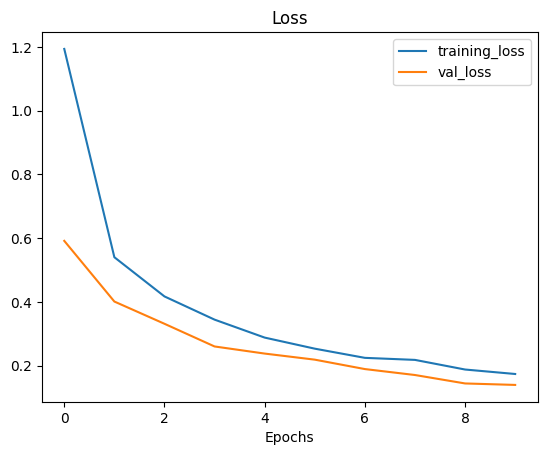

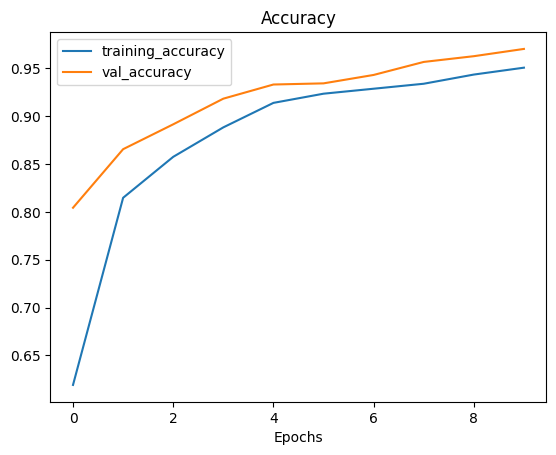

In [72]:
plot_loss_curves(history_res)

### Create and test efficient_net_b0 model :

In [73]:
# Create efficient_net model
effnet_model = create_model(efficientnet_url)

In [74]:
effnet_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                     optimizer = "Adam",
                     metrics = ["accuracy"])

In [75]:
history_eff =  effnet_model.fit(train_data,
                                epochs = 5,
                                steps_per_epoch = len(train_data),
                                validation_data=test_data,
                                validation_steps = len(test_data),
                                callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub",
                                                                          experiment_name = "efficient_net_b0")])

Saving Tensorflow log files to : tensorflow_hub/efficient_net_b0/20250527-190951
Epoch 1/5
79/79 [==============================] - 29s 236ms/step - loss: 2.2766 - accuracy: 0.3604 - val_loss: 2.2503 - val_accuracy: 0.5656
Epoch 2/5
79/79 [==============================] - 17s 221ms/step - loss: 2.2260 - accuracy: 0.5772 - val_loss: 2.1989 - val_accuracy: 0.6420
Epoch 3/5
79/79 [==============================] - 15s 196ms/step - loss: 2.1774 - accuracy: 0.6440 - val_loss: 2.1532 - val_accuracy: 0.6600
Epoch 4/5
79/79 [==============================] - 17s 212ms/step - loss: 2.1297 - accuracy: 0.6644 - val_loss: 2.1062 - val_accuracy: 0.6800
Epoch 5/5
79/79 [==============================] - 17s 214ms/step - loss: 2.0850 - accuracy: 0.6728 - val_loss: 2.0621 - val_accuracy: 0.6848


In [77]:
# Make a prediction using model
#Create a function to import a image and resize it to be able to be used with our model
def load_and_prep(filename,img_shape=224):
  """
  Reads an image from filename and reshapes it into a tensor of desired size(here 224)
  (img_shape,img_shape,color_channels)
  """
  # READ IN THE IMAGE
  img = tf.io.read_file(filename)
  # DECODE THE READ FILE INTO A TENSOR
  img = tf.image.decode_image(img)
  # RESIZE THE IMAGE
  img  = tf.image.resize(img,size = [img_shape,img_shape])
  # RESCALE THE IMAGE AND GET ALL VALUES BETWEEN 0 AND 1
  img = img/255.0
  return img

def pred_and_plot(model,filename,class_names = class_names):
  """
  IMPORTS IMAGE AND MAKES A PREDICTION ON IMAGE
  AND PLOTS IT WITH PREDICTED CLASS NAME
  """
  # IMPORT TARGET IMAGE AND PREPROCESS IT
  img = load_and_prep(filename)
  # MAKE A PREDICTION
  pred = model.predict(tf.expand_dims(img,axis = 0))[0]
  # GET PREDICTED CLASS

  pred_class = class_names[(tf.argmax(pred))]
  # PLOT THE IMAGE AND PREDICTED CLASS

  plt.imshow(img)
  plt.title(f"Predicted : {pred_class} ")
  plt.axis(False)
  plt.show()

1/1 [==============================] - 1s 1s/step


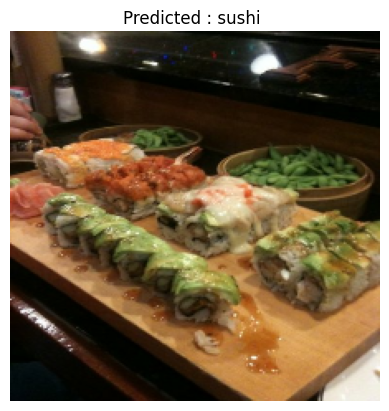

In [78]:
test_image_file_path = "/content/10_food_classes_10_percent/test/sushi/101625.jpg"

pred_and_plot(resnet_model, test_image_file_path)

1/1 [==============================] - 1s 928ms/step


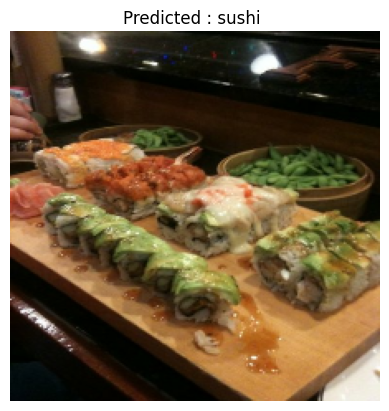

In [79]:
test_image_file_path = "/content/10_food_classes_10_percent/test/sushi/101625.jpg"

pred_and_plot(effnet_model, test_image_file_path)

In [80]:
len(effnet_model.layers[0].weights)

311

# Different types of transfer learning
* **As is** transfer learning - using an existing model with no changes what so ever (e.g using ImageNet model on 1000 ImageNet classes, none of your own)
* "**Feature extraction**" transfer learning - use the prelearned patterns of an existing model (e.g. EfficientNetB0 trained on ImageNet) and adjust the output layer for your own problem (e.g. 1000 classes -> 10 classes of food)
* "**Fine-tuning**" transfer learning - use the prelearned patterns of an existing model and "fine-tune" many or all of the underlying layers (including new output layers)

# Comparing our models results using TensorBoard

🔑 **Note**: When you upload things to TensorBoard.dev, you experiments are public. So if you're running private experiments (things you don't want others to see) do not upload them to TensorBoard.dev.

In [84]:
# Upload tensorboard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
--name "EfficientNetB0 vs. ResNet50V2" \
--description "Comparing two different TF Hub feature extraction model architectures using 10% of the training data" \
--one_shot

2025-05-27 19:20:12.112012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748373612.134008   49821 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748373612.140525   49821 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
ERROR: The `tensorboard dev` command is no longer available.

TensorBoard.dev has been shut down. For further information,
see the FAQ at <https://tensorboard.dev/>.
